# 常用文件的打开模式

参考资料：
https://pokes.blog.csdn.net/article/details/128688818

## 文件的类型

按文件中数据的组织形式，文件分为以下两大类

- 文本文件：存储是普通“字符”文本，默认为unicode字符集，可以使用记事本程序打开；
- 二进制文件：把数据内容用“字节”进行存储，无法用记事本打开，必须使用专用软件打开，例如：音乐，图片，视频，word文件等。

一般比较常用的就是这三个，w是写入，a 是追加，r是读取 

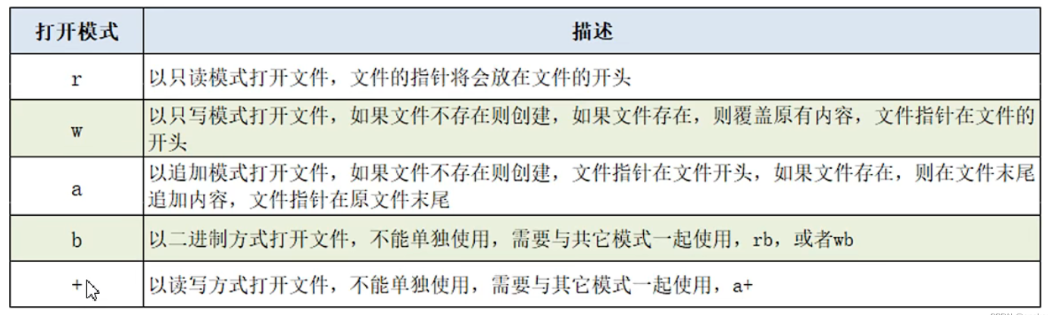

## 文件的读取

下面以ceshi.txt文件进行说明：

所在路径：D:/code/python/04.文件操作/ceshi.txt

测试ceshi.txt文件的内容:
```
helloword1
helloword2
helloword3
```

### read方法

read方法是读取全部内容，但是可以进行一些限制，例如字符的限制等等。

In [ ]:
#f = open('ceshi.txt',"r", encoding='UTF-8')     ##相对路径可以这样写
f = open('D:/code/python/04.文件操作/ceshi.txt',"r", encoding='UTF-8')    #绝对路径
print(f)
print(type(f))      #查看文件类型

print({f.read()})     #不指定参数，则以列表方式打印
print({f.read(2)})    #读取两个字符

注意：<font color='red'>如果多次使用read，会触发内置的指针，第一次读到哪里，第二次接着读，不是从头开始的。</font>

如果你用的是VScode报错请查看这里：
https://pokes.blog.csdn.net/article/details/128688141

### readline方法

In [ ]:
f = open('D:/code/python/04.文件操作/ceshi.txt',"r", encoding='UTF-8')
print(f)
print(type(f))         #查看类型

line = f.readline()
print({type(line)})
print(line)
f.close()
————————————————————————————————
运行结果：
<class '_io.TextIOWrapper'>
{<class 'str'>}
helloword1

通过for循环来读取每一行

In [ ]:
f = open('D:/code/python/04.文件操作/ceshi.txt',"r", encoding='UTF-8')
line = f.readline()
for line in f:
    print(line)

### readlines方法

读取文件的全部行，封装到列表中

In [ ]:
f = open('D:/code/python/04.文件操作/ceshi.txt',"r", encoding='UTF-8')
print(f)
print(type(f))         #查看类型

lines = f.readlines()
print({type(lines)})   #查看类型
print(lines)
f.close()
————————————————————————————————
运行结果：
<class '_io.TextIOWrapper'>          #源文件类型是个文本
{<class 'list'>}					 #是个列表
['helloword1\n', 'helloword2\n', 'helloword3']    #列表内容

### seek

跳过字节读取

In [ ]:
a.txt文件内容
中国
美丽

In [ ]:
file=open('a.txt','r',encoding='UTF-8')
file.seek(2)        #光标跳过2个字节后读取剩下的注意一个汉字占两个字节，这里写1会报错
print(file.read())
file.close()
——————————————————————————————
运行结果：
国
美丽

### with open语句

In [ ]:
with open("D:/code/python/04.文件操作/ceshi.txt","r", encoding="UTF-8") as f:
    for line in f:
        print(line)

运行结果：       
helloword1

helloword2

helloword3


## 文件的写入与追加

### w模式
- 文件存在，清空文件内原有内容，再写入本次内容
- 当文件不存在W会创建，再写入本次内容

用法演示：

file=open('b.txt','w')
file.write('helloworld')
file.close()

案例1：

In [ ]:
import time
f = open('D:/code/python/04.文件操作/ceshi.txt',"w", encoding='UTF-8')
f.write("hello word")       #虽然写入成功，但是文件中没有内容，是因为文件内容在内存中。
f.flush()                   #将内存中积攒的程序，刷新写入到硬盘中
time.sleep(60000)           #程序停止6W秒，才能看见f.flush的效果
f.close()                   #其实在这里我们的close方法内置了flush的方法，既然内置上面的就显得多余了

### a模式

在原有内容的基础上进行追加，追加的内容不会换行，如果想换行，我们可以加`\n`。

In [ ]:
f = open('D:/code/python/04.文件操作/ceshi.txt',"a", encoding='UTF-8')
f.write("hello word2")
f.close()

In [ ]:
f = open('D:/code/python/04.文件操作/ceshi.txt',"a", encoding='UTF-8')
f.write("\nhello word3")     #字符串前面加\n
f.close()

## 二进制文件的读取和写入

In [ ]:
src_file=open('logo.png',rb)            #rb读取二进制文件，src_file源文件
target_file=open('copylogo.png',wb)     #wb写入二进制文件，target_file是目标文件
target_file.write(src_file.read())      #边读边写
target_file.close()                     #完事后关闭
src_file.close()                        #完事后关闭